



# 1.Load and visualize dataset




Dataset Head:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


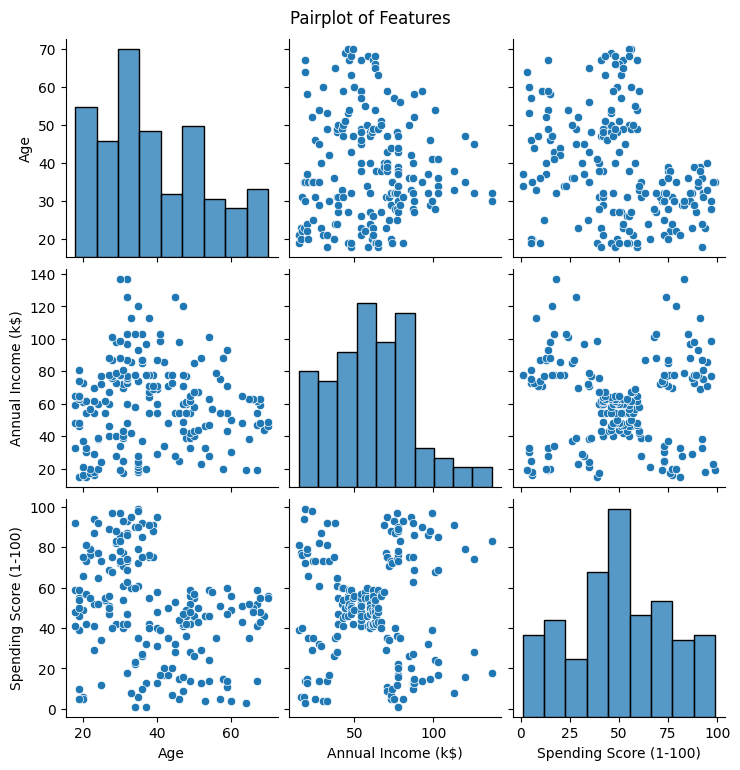

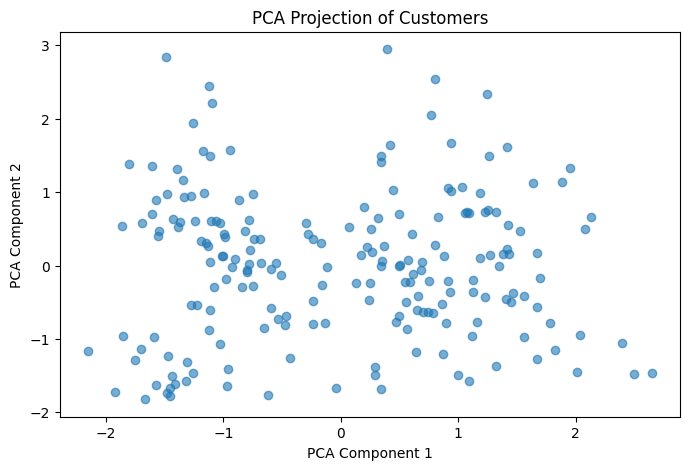

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')

# Preview data
print("Dataset Head:\n", df.head())
print("\nData Info:")
print(df.info())

# Optional: Visualize pairplot
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Extract features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Customers")
plt.show()




# 2.Fit K-Means and assign cluster labels.



In [6]:
from sklearn.cluster import KMeans

# KMeans with K=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to original dataframe
df['Cluster'] = clusters

# Preview clustered data
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

# Count customers in each cluster
print("\nCustomer count in each cluster:")
print(df['Cluster'].value_counts().sort_index())


   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        2
1   21                  15                      81        2
2   20                  16                       6        3
3   23                  16                      77        2
4   31                  17                      40        2

Customer count in each cluster:
Cluster
0    58
1    40
2    26
3    45
4    31
Name: count, dtype: int64




# 3.Use the Elbow Method to find optimal K



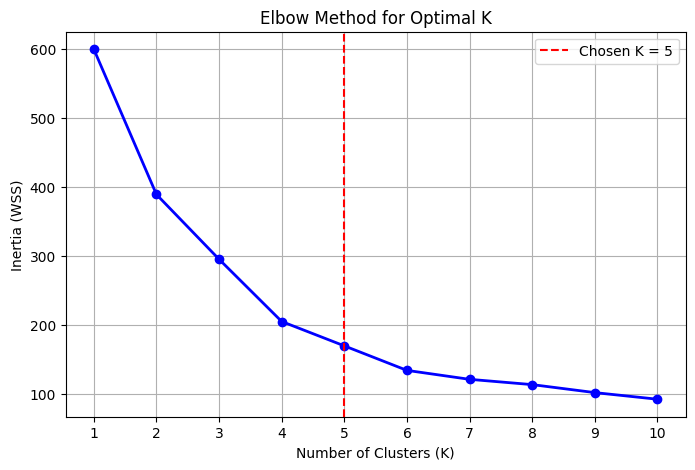

In [7]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-', linewidth=2)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)

# Annotate elbow point manually (optional)
elbow_k = 5  # manually chosen based on plot
plt.axvline(x=elbow_k, color='red', linestyle='--', label=f'Chosen K = {elbow_k}')
plt.legend()
plt.show()




# 4.Visualize clusters with color-coding.



In [8]:
from sklearn.decomposition import PCA

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained Variance by PCA: {pca.explained_variance_ratio_.sum():.2f}")


Explained Variance by PCA: 0.78


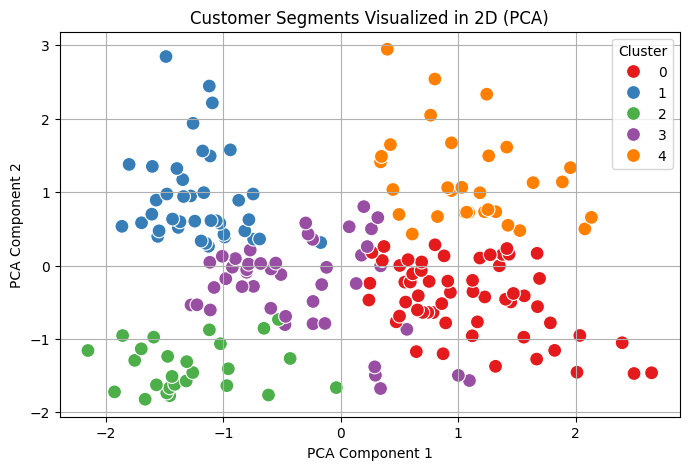

In [9]:
# PCA 2D Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1', s=100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments Visualized in 2D (PCA)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



# 5.Evaluate clustering using Silhouette Score.



In [11]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score for K=5: {sil_score:.4f}')
print("\nSilhouette Scores for K = 2 to 10:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}: Silhouette Score = {score:.4f}")



Silhouette Score for K=5: 0.4085

Silhouette Scores for K = 2 to 10:
K=2: Silhouette Score = 0.3355
K=3: Silhouette Score = 0.3579
K=4: Silhouette Score = 0.4040
K=5: Silhouette Score = 0.4085
K=6: Silhouette Score = 0.4311
K=7: Silhouette Score = 0.4101
K=8: Silhouette Score = 0.3674
K=9: Silhouette Score = 0.3744
K=10: Silhouette Score = 0.3619
